### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ву Ньят Нам
##### Группа:   НПИбд-01-17


## Москва 2020
***

### Вариант № 10


Automobile Data Set  

Название файла: imports-85.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Automobile 

Первый признак: length (столбец No 11) 

Второй признак: width (столбец No 12) 

Класс: num-of-doors (столбец No 6) 

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

Меры качества: Чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Фоулкса – Мэллоуса 

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

In [1]:
from urllib.request import urlopen
from contextlib import closing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
with closing(urlopen(url)) as u, open("imports.csv", "w") as f:
    f.write(u.read().decode())
data = pd.DataFrame(np.genfromtxt("imports.csv",delimiter=",", usecols=(10,11,5), dtype=str))
data = data[data.loc[:]!='?']

In [3]:
pd.options.display.max_columns = 3
pd.options.display.max_rows = 205
data

,0,1,2
0,168.80,64.10,two
1,168.80,64.10,two
2,171.20,65.50,two
3,176.60,66.20,four
4,176.60,66.40,four
5,177.30,66.30,two
6,192.70,71.40,four
7,192.70,71.40,four
8,192.70,71.40,four
9,178.20,67.90,two


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       205 non-null    object
 1   1       205 non-null    object
 2   2       203 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


In [5]:
data = data.replace('two', 2)
data = data.replace('four', 4)
data

,0,1,2
0,168.80,64.10,2.0
1,168.80,64.10,2.0
2,171.20,65.50,2.0
3,176.60,66.20,4.0
4,176.60,66.40,4.0
5,177.30,66.30,2.0
6,192.70,71.40,4.0
7,192.70,71.40,4.0
8,192.70,71.40,4.0
9,178.20,67.90,2.0


In [6]:
print(pd.DataFrame(data).isnull().sum())
data = data.dropna()
X = data[[0,1]].values.astype(float)
y = data[2].values.astype('str')

0    0
1    0
2    2
dtype: int64


3.	Если количество различных меток класса больше семи, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь.

In [7]:
np.unique(y)

array(['2.0', '4.0'], dtype='<U32')

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

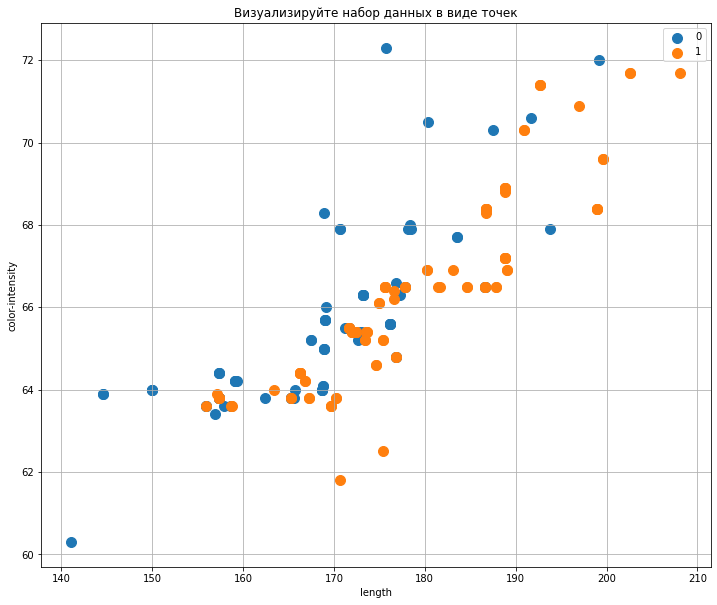

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label=cluster)
    plt.grid(True)
    plt.title('Визуализируйте набор данных в виде точек')
    plt.xlabel('length')
    plt.ylabel('color-intensity')
    plt.legend()
    plt.show()

plot_cluster(X,y)

5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

## K-means

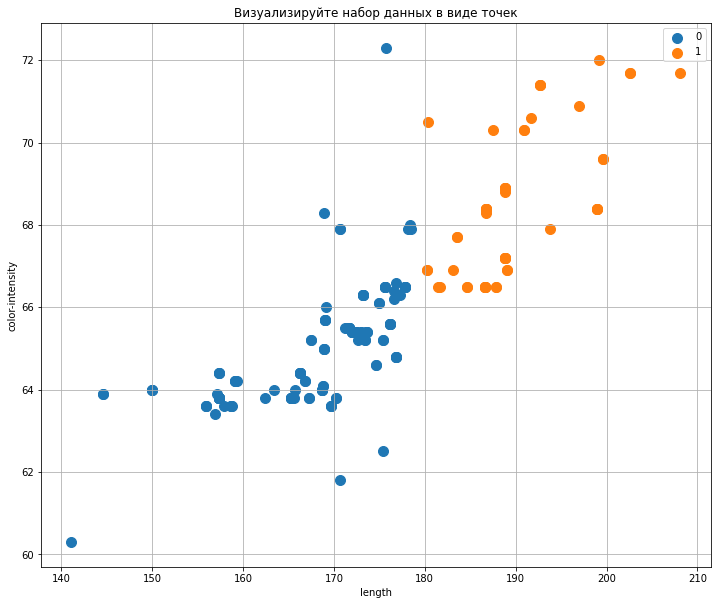

In [10]:
# кластеризация k-means 
from sklearn.cluster import KMeans
# набор данных

model = KMeans(n_clusters=2)
# тренируем модель
model.fit(X)
# присваиваем метку каждой точке набора
point1 = model.predict(X)

plot_cluster(X,point1)

## Agglomerative Clustering

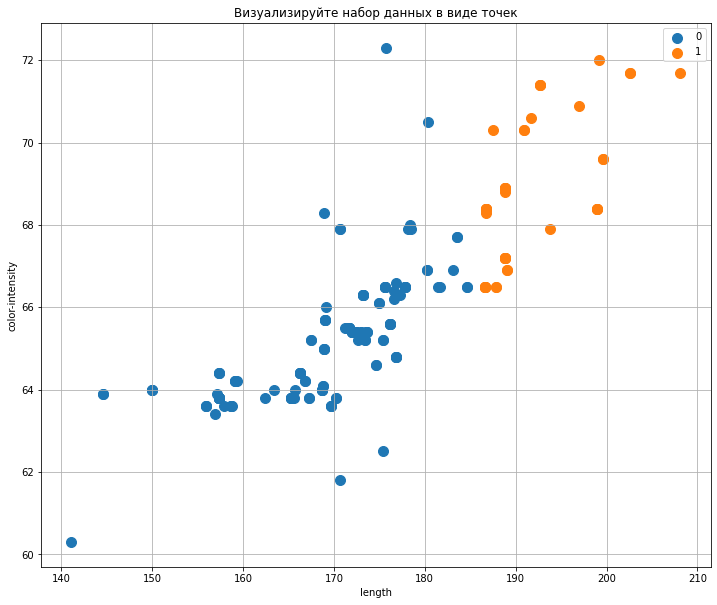

In [11]:
# иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

# модель иерархической кластеризации, рассояние между кластерами методом Ward
model = AgglomerativeClustering(n_clusters=2)
# тренируем модель и присваиваем метку каждой точке набора
point2 = model.fit_predict(X)

plot_cluster(X,point2)

## DBSCAN

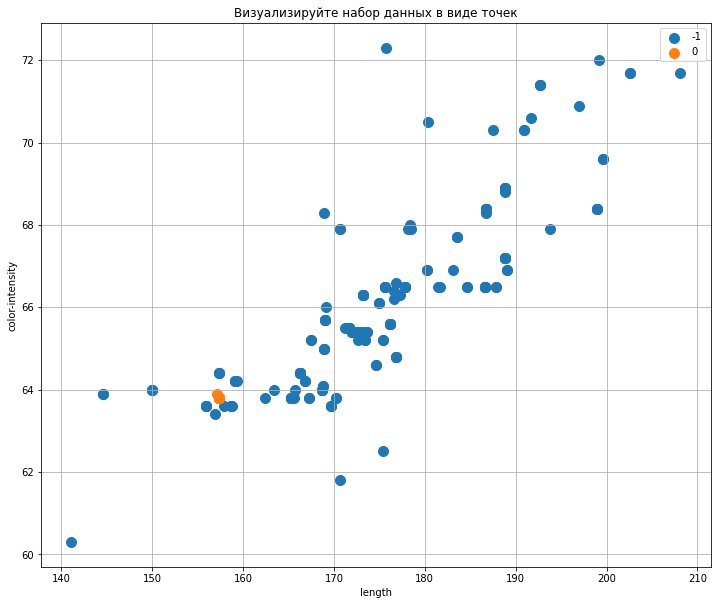

In [12]:
# кластеризация dbscan 
from sklearn.cluster import DBSCAN

# модель
model = DBSCAN(eps=0.30, min_samples=9)
# тренируем модель и присваиваем метку каждой точке набора
point3 = model.fit_predict(X)

plot_cluster(X,point3)

## Gaussian Mixture Model

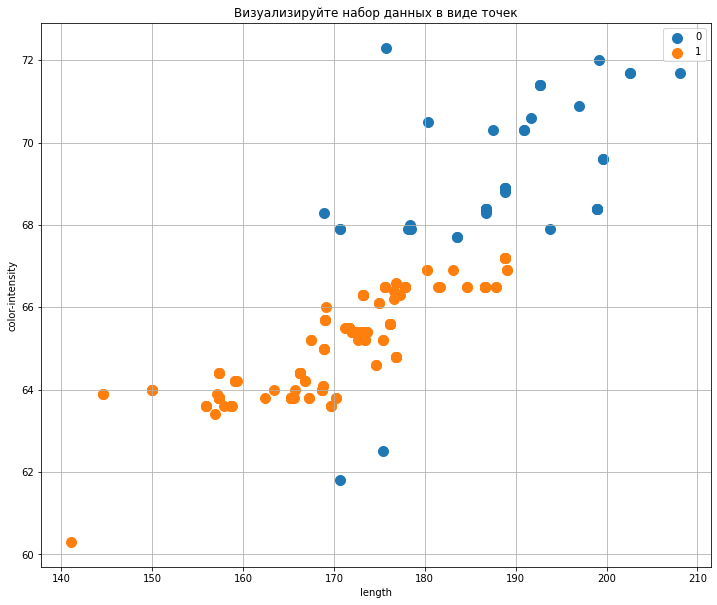

In [13]:
# кластеризация при помощи гауссовских смесей
from sklearn.mixture import GaussianMixture

# модель
model = GaussianMixture(n_components=2)
# тренируем модель
model.fit(X)
# присваиваем метку каждой точке набора
point4 = model.predict(X)

plot_cluster(X,point4)

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности и найдите значения мер качества кластеризации, указанные в индивидуальном задании, не пользуясь функциями из библиотеки scikit-learn.  



## K-Means

In [14]:
import numpy as np
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('True negative = ', cm[1][0])
    print('False negative = ', cm[1][1])
    
print(purity_score(y, point1))
print()
print(print_confusion_matrix(y, point1))
print()
print(fowlkes_mallows_score(y, point1))

0.6206896551724138

True positive =  79
False positive =  10
True negative =  67
False negative =  47
None

0.571401338055145


## Agglomerative Clustering

In [15]:
print(purity_score(y, point2))
print(print_confusion_matrix(y, point2))
print(fowlkes_mallows_score(y, point2))

0.6009852216748769
True positive =  82
False positive =  7
True negative =  74
False negative =  40
None
0.5841831259479852


## DBSCAN

In [16]:
print(purity_score(y, point3))
print(print_confusion_matrix(y, point3))
print(fowlkes_mallows_score(y, point3))

0.5714285714285714
True positive =  0
False positive =  0
True negative =  82
False negative =  7
None
0.6726576297096094


## Gaussian Mixture

In [17]:
print(purity_score(y, point4))
print(print_confusion_matrix(y, point4))
print(fowlkes_mallows_score(y, point4))

0.5615763546798029
True positive =  14
False positive =  75
True negative =  29
False negative =  85
None
0.5760095758758813


7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

In [18]:
pd.DataFrame([fowlkes_mallows_score(y, point1),
              fowlkes_mallows_score(y, point2),
              fowlkes_mallows_score(y, point3),
              fowlkes_mallows_score(y, point4)])

,0
0,0.571401
1,0.584183
2,0.672658
3,0.576010


8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

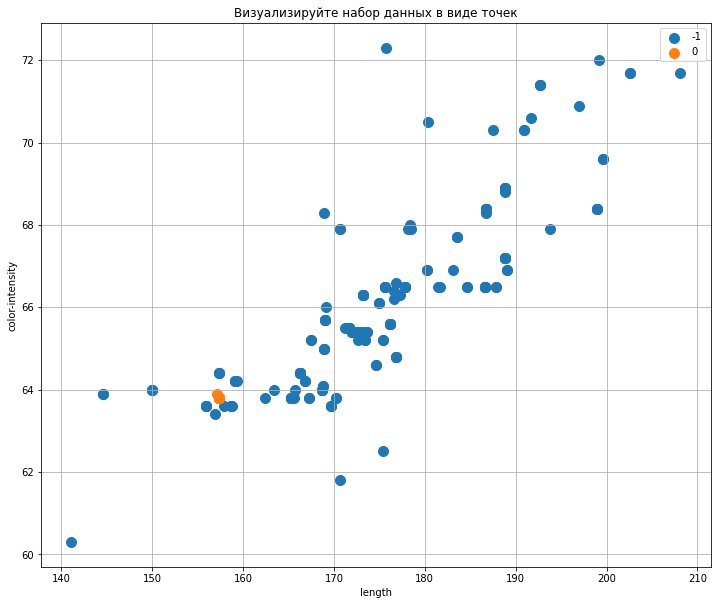

In [19]:
def plot_cluster(X,y):
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100, label=cluster)
    plt.grid(True)
    plt.title('Визуализируйте набор данных в виде точек')
    plt.xlabel('length')
    plt.ylabel('color-intensity')
    plt.legend()
    plt.show()

plot_cluster(X,point3)